# Solution pipeline

## Import modules

In [4]:
import pandas as pd
import solution.ardata_cleaning as ac
import solution.feature_create as fc

## Get Data

In [5]:
df = ac.get_ar_data(url="https://s3.amazonaws.com/arrivalist-puzzles/interview_data.csv.zip")
df.info()

/storage/home/lul165/.conda/envs/llyenv/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3248: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16125354 entries, 0 to 16125353
Data columns (total 13 columns):
device_id       int64
ts              object
ts_date         object
ts_quarter      object
lat             float64
lon             float64
geohash5        object
country         object
region          object
city            object
zip_code        object
publisher_id    float64
partner_id      int64
dtypes: float64(3), int64(2), object(8)
memory usage: 1.6+ GB


## Resampling and cleaning data

In [6]:
df_rs = ac.ardata_pipe(df,'5T')
df_rs = df_rs[(df_rs['travelSpeed'] < 1000) & (df_rs['travelSpeed'] > 0)]

## Create traveler features and prepare training data

In [7]:
X_train = fc.create_userFeature(df_rs)

In [20]:
X_train  = X_train.fillna(0)

In [21]:
X_train.describe()

,avgDailyFreq,avgUsedayFreq,weekdayStay,weekendStay,avgcountryyear,avgcountrymonth,avgcountryweek,avgregionyear,avgregionmonth,avgregionweek,avgcityyear,avgcitymonth,avgcityweek,km_cluster
count,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.00000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000
mean,3.556139,6.012987,1.255925,1.019096,1.168059,1.016895,1.00510,2.738162,1.379613,1.152671,20.466110,5.843987,3.027338,1.699164
std,7.536704,9.304684,1.212434,1.273241,0.528536,0.084374,0.03373,2.470676,0.651431,0.287594,54.545009,13.613142,5.041884,1.770926
min,0.009302,1.000000,0.000000,0.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,0.146939,1.291667,0.000000,0.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,3.000000,1.500000,1.214286,0.000000
50%,0.434783,1.807692,1.166667,0.000000,1.000000,1.000000,1.00000,2.000000,1.166667,1.035714,7.000000,2.500000,1.615385,2.000000
75%,2.955665,6.490000,2.000000,1.875000,1.000000,1.000000,1.00000,3.000000,1.500000,1.200000,17.000000,5.166667,2.727273,3.000000
max,81.354331,91.030837,7.771186,8.555556,11.000000,2.000000,1.75000,28.000000,11.333333,4.923077,1253.000000,271.833333,97.541667,5.000000


# kmeans clustering

In [9]:
from solution.train_kmeans import fit_kmeans

In [17]:
X_train = fit_kmeans(X_train,k=6)

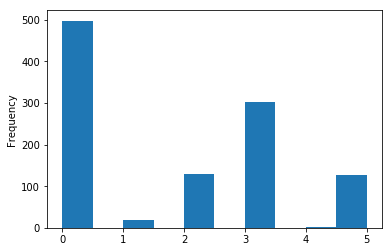

In [18]:
X_train.km_cluster.plot.hist()